# Comparing Neural Networks to scikit-learn
Various imports I will be using...

I like to use Keras because frankly TensorFlow scares me a little bit and Keras makes it an absolute breeze. Not only that, but Keras also has wrappers which allow you to use your neural nets in your scikit-learn Pipelines.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.datasets import make_moons
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.


### The Data
Like the example you were giving I will use the make moons data set provided by scikit-learn.

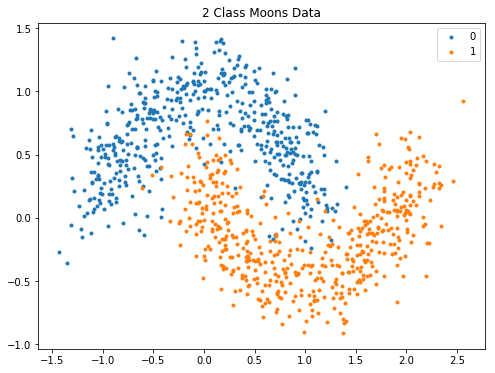

In [2]:
X, y = make_moons(1000, noise=0.2)
Fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plt.scatter(X[y==0,0], X[y==0,1], marker='.', label=0)
plt.scatter(X[y==1,0], X[y==1,1], marker='.', label=1)
plt.title('2 Class Moons Data')
plt.legend()
plt.show()

### Keras NN Classifier
To use the KerasClassifier like a scikit-learn classifier, you must write a function which creates and returns a neural network model.

In [3]:
def nn_model():
    # create model
    model = Sequential()
    model.add(Dense(30, input_dim=2, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

nnc = KerasClassifier(build_fn=nn_model, epochs=100, batch_size=5, verbose=0)

Now you compared the neural network's performance to that of the SDGClassifier of scikit-learn, which we can construct here.

In [4]:
sgdc = SGDClassifier(loss='log',
                     penalty=None,
                     shuffle=True,
                     tol=None,
                     max_iter=100,
                     fit_intercept=True)

### Comparing these Models
I think it's illustrative especially in the case of 2 deminsional data to plot the regions that the classifiers have found.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Fitting and testing the models...
classifiers = [nnc, sgdc]
scores = []
for clf in classifiers:
    clf.fit(X_train, y_train)
    scores.append(clf.score(X_test, y_test))

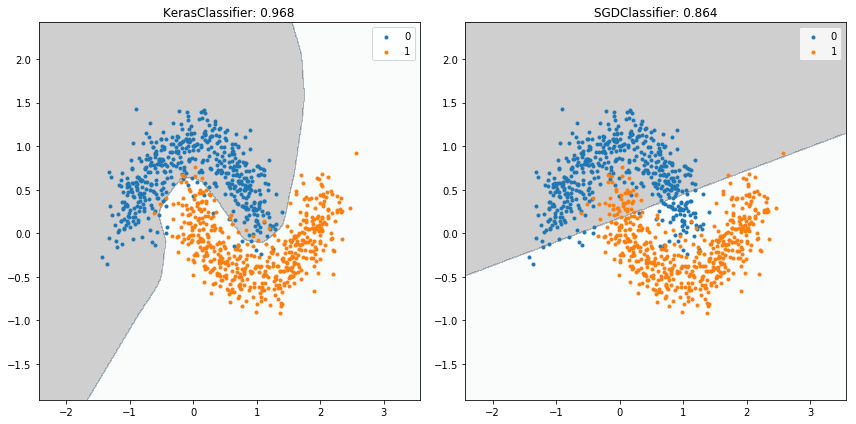

In [6]:
### Plotting the regions
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for clf, ax, score in zip(classifiers, axes.flatten(), scores):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.bone)
    ax.scatter(X[y==0,0], X[y==0,1], marker='.', label=0)
    ax.scatter(X[y==1,0], X[y==1,1], marker='.', label=1)
    ax.legend()
    ax.set_title('{}: {:.5}'.format(clf.__class__.__name__, str(score)))
plt.tight_layout()
plt.show()

It's clear here to see why the neural network did so much better. A linear model will never succed with this type of data. Although 88% isn't all that bad.

To compare them a little more fairly I thought I would fit and compare a couple of other more popular classifiers as well.

In [7]:
### Default Settings
rfc = RandomForestClassifier()
svc = SVC()

new_classifiers = [rfc, svc]
new_scores = []
for clf in new_classifiers:
    clf.fit(X_train, y_train)
    new_scores.append(clf.score(X_test, y_test))
    
scores.extend(new_scores)
classifiers.extend(new_classifiers)

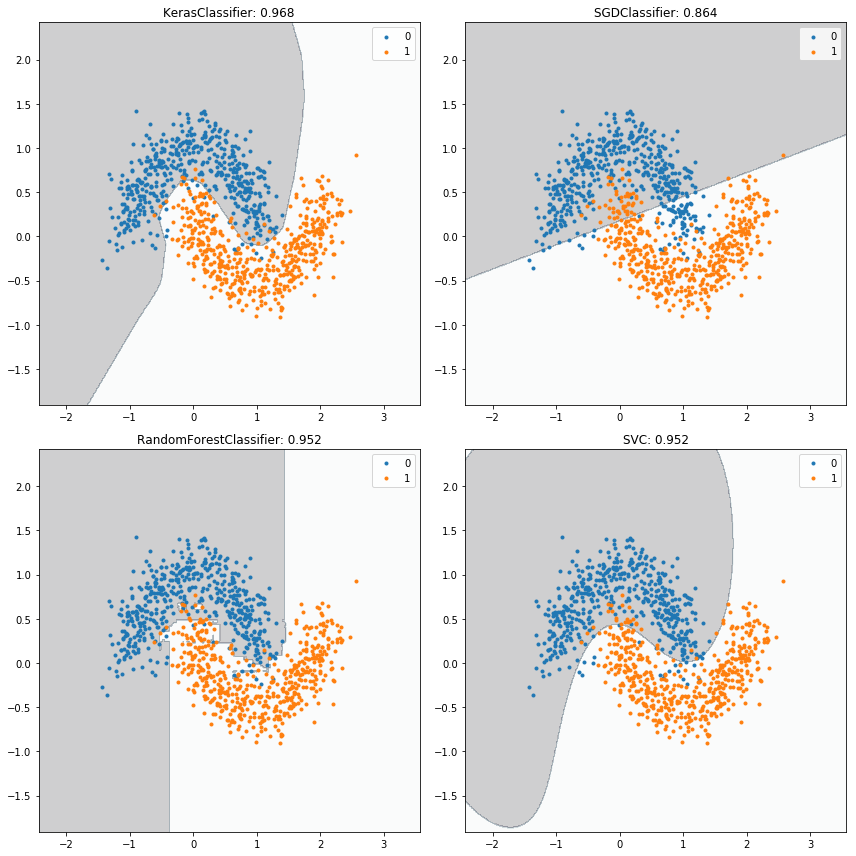

In [8]:
### Plotting the regions
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

for clf, ax, score in zip(classifiers, axes.flatten(), scores):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.2, cmap=plt.cm.bone)
    ax.scatter(X[y==0,0], X[y==0,1], marker='.', label=0)
    ax.scatter(X[y==1,0], X[y==1,1], marker='.', label=1)
    ax.legend()
    ax.set_title('{}: {:.5}'.format(clf.__class__.__name__, str(score)))
plt.tight_layout()
plt.show()